# Monitorando as águas

## Filtrando linhas

### Selecionando linhas com paramatros desejados

In [240]:
import pandas as pd

In [241]:
dados_3anos = pd.read_excel('RelatorioQualidadeAguasSuperficiais_3anos.xlsx')

In [242]:
dados_3anos.head()

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação
0,01/01/2019,10/05/2022,2195,Rede Básica,06 - ALTO TIÊTE,SPRA04850,Ativo,03/01/2019,12:15,pH,...,Classe 4,SÃO PAULO,SP,01/01/2012,NaN,23 36 52,46 41 21,737,Ponte na Av. Roberto Marinho com a Rua Ribeiro...,N
1,01/01/2019,10/05/2022,2195,Rede Básica,06 - ALTO TIÊTE,SPRA04850,Ativo,13/03/2019,11:00,pH,...,Classe 4,SÃO PAULO,SP,01/01/2012,NaN,23 36 52,46 41 21,737,Ponte na Av. Roberto Marinho com a Rua Ribeiro...,N
2,01/01/2019,10/05/2022,2195,Rede Básica,06 - ALTO TIÊTE,SPRA04850,Ativo,25/04/2019,10:45,pH,...,Classe 4,SÃO PAULO,SP,01/01/2012,NaN,23 36 52,46 41 21,737,Ponte na Av. Roberto Marinho com a Rua Ribeiro...,N
3,01/01/2019,10/05/2022,2195,Rede Básica,06 - ALTO TIÊTE,SPRA04850,Ativo,16/05/2019,11:45,pH,...,Classe 4,SÃO PAULO,SP,01/01/2012,NaN,23 36 52,46 41 21,737,Ponte na Av. Roberto Marinho com a Rua Ribeiro...,N
4,01/01/2019,10/05/2022,2195,Rede Básica,06 - ALTO TIÊTE,SPRA04850,Ativo,06/06/2019,11:45,pH,...,Classe 4,SÃO PAULO,SP,01/01/2012,NaN,23 36 52,46 41 21,737,Ponte na Av. Roberto Marinho com a Rua Ribeiro...,N


In [243]:
dados_3anos = dados_3anos[['Data Coleta', 'Parametro', 'Valor', 'Unidade' ]]

In [244]:
dados_3anos

,Data Coleta,Parametro,Valor,Unidade
0,03/01/2019,pH,"7,58000000",U.pH
1,13/03/2019,pH,"7,54000000",U.pH
2,25/04/2019,pH,"7,50000000",U.pH
3,16/05/2019,pH,"7,56000000",U.pH
4,06/06/2019,pH,"7,58000000",U.pH
...,...,...,...,...
846,12/11/2019,Carbono Orgânico Total,"28,20000000",mg/L
847,05/12/2019,Carbono Orgânico Total,"34,30000000",mg/L
848,04/03/2020,Carbono Orgânico Total,"15,60000000",mg/L
849,03/01/2019,Nitrogênio Total,"24,80000000",mg/L


### Separando em dfs (opcional) e selecionando colunas desejadas

In [245]:
df_pH = dados_3anos.loc[(dados_3anos['Parametro'] == 'pH')]
df_pH.rename(columns={'Valor':'Valor pH(U.pH)'}, inplace=True)

df_temp = dados_3anos.loc[(dados_3anos['Parametro'] == 'Temperatura da Água')]
df_temp.rename(columns={'Valor':'Valor temperatura(ºC)'}, inplace=True)

df_fosf = dados_3anos.loc[(dados_3anos['Parametro'] == 'Fósforo Total')]
df_fosf.rename(columns={'Valor':'Valor fosforo(mg/L)'}, inplace=True)

df_dbo = dados_3anos.loc[(dados_3anos['Parametro'] == 'DBO (5, 20)')]
df_dbo.rename(columns={'Valor':'Valor DBO(mg/L)'}, inplace=True)

df_nit = dados_3anos.loc[(dados_3anos['Parametro'] == 'Nitrogênio Kjeldahl') | (dados_3anos['Parametro'] == 'Nitrogênio-Nitrito') 
            | (dados_3anos['Parametro'] == 'Nitrogênio-Nitrato')]
df_nit.rename(columns={'Valor':'Valor nitrogenio(mg/L)'}, inplace=True)

df_coli = dados_3anos.loc[(dados_3anos['Parametro'] == 'Escherichia coli**')]
df_coli.rename(columns={'Valor':'Valor coliforme(UFC/100mL)'}, inplace=True)

df_oxi = dados_3anos.loc[(dados_3anos['Parametro'] == 'Oxigênio Dissolvido')]
df_oxi.rename(columns={'Valor':'Valor oxigenio(mg/L)'}, inplace=True)

df_turb = dados_3anos.loc[(dados_3anos['Parametro'] == 'Turbidez')]
df_turb.rename(columns={'Valor':'Valor turbidez(UNT)'}, inplace=True)

df_sol = dados_3anos.loc[(dados_3anos['Parametro'] == 'Sólido Total')]
df_sol.rename(columns={'Valor':'Valor solidos(mg/L)'}, inplace=True)


c:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [246]:
print(
df_pH.shape[0],
df_temp.shape[0],
df_fosf.shape[0],
df_dbo.shape[0],
df_nit.shape[0],
df_coli.shape[0],
df_oxi.shape[0],
df_turb.shape[0],
df_sol.shape[0])

21 21 21 14 61 21 21 21 21


In [247]:
dfs = [
        df_pH,
        df_temp,
        df_fosf,
        df_dbo,
        df_nit,
        df_coli,
        df_oxi,
        df_turb,
        df_sol]

In [248]:
for df in dfs:
   df.drop(['Parametro','Unidade'], inplace=True, axis=1)

c:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [249]:
df_oxi.head()

,Data Coleta,Valor oxigenio(mg/L)
365,03/01/2019,"0,59000000"
366,13/03/2019,"3,29000000"
367,25/04/2019,"1,16000000"
368,16/05/2019,"3,63000000"
369,06/06/2019,"2,30000000"


### Juntando os dfs

In [250]:
from functools import reduce

In [251]:
df_juntos = reduce(lambda  left,right: pd.merge(left,right,on=['Data Coleta'],
                                            how='outer'), dfs)

In [252]:
df_juntos

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,03/01/2019,"7,58000000","27,00000000","2,54000000","45,00000000","0,10000000","5200000,00000000","0,59000000","48,30000000","310,00000000"
1,03/01/2019,"7,58000000","27,00000000","2,54000000","45,00000000","0,20000000","5200000,00000000","0,59000000","48,30000000","310,00000000"
2,13/03/2019,"7,54000000","24,90000000","1,26000000","15,00000000","0,23000000","1800000,00000000","3,29000000","17,70000000","258,00000000"
3,13/03/2019,"7,54000000","24,90000000","1,26000000","15,00000000","1,85000000","1800000,00000000","3,29000000","17,70000000","258,00000000"
4,25/04/2019,"7,50000000","25,80000000","2,31000000","33,00000000","21,80000000","2900000,00000000","1,16000000","54,50000000","356,00000000"
...,...,...,...,...,...,...,...,...,...,...
56,05/12/2019,"7,20000000","24,40000000","2,49000000","61,90000000","0,10000000","3800000,00000000","1,16000000","56,30000000","308,00000000"
57,05/12/2019,"7,20000000","24,40000000","2,49000000","61,90000000","0,20000000","3800000,00000000","1,16000000","56,30000000","308,00000000"
58,04/03/2020,"7,40000000","22,60000000","1,36000000","26,90000000","17,60000000","1200000,00000000","2,81000000","10,60000000","228,00000000"
59,04/03/2020,"7,40000000","22,60000000","1,36000000","26,90000000","0,17000000","1200000,00000000","2,81000000","10,60000000","228,00000000"


----------

## Organizando em ordem cronológica e convertendo tipos

### Convertendo data

In [253]:
df_juntos['Data Coleta'].dtypes

dtype('O')

In [254]:
df_juntos['Data Coleta'] = pd.to_datetime(df_juntos['Data Coleta'], format='%d/%m/%Y',  errors='coerce')

In [255]:
df_juntos.head()

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01-03,"7,58000000","27,00000000","2,54000000","45,00000000","0,10000000","5200000,00000000","0,59000000","48,30000000","310,00000000"
1,2019-01-03,"7,58000000","27,00000000","2,54000000","45,00000000","0,20000000","5200000,00000000","0,59000000","48,30000000","310,00000000"
2,2019-03-13,"7,54000000","24,90000000","1,26000000","15,00000000","0,23000000","1800000,00000000","3,29000000","17,70000000","258,00000000"
3,2019-03-13,"7,54000000","24,90000000","1,26000000","15,00000000","1,85000000","1800000,00000000","3,29000000","17,70000000","258,00000000"
4,2019-04-25,"7,50000000","25,80000000","2,31000000","33,00000000","21,80000000","2900000,00000000","1,16000000","54,50000000","356,00000000"


In [256]:
df_juntos['Data Coleta'].dtypes

dtype('<M8[ns]')

### Orem cronológica

In [257]:
df_cron = df_juntos.sort_values(by='Data Coleta')

In [258]:
df_cron.head()

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01-03,"7,58000000","27,00000000","2,54000000","45,00000000","0,10000000","5200000,00000000","0,59000000","48,30000000","310,00000000"
1,2019-01-03,"7,58000000","27,00000000","2,54000000","45,00000000","0,20000000","5200000,00000000","0,59000000","48,30000000","310,00000000"
2,2019-03-13,"7,54000000","24,90000000","1,26000000","15,00000000","0,23000000","1800000,00000000","3,29000000","17,70000000","258,00000000"
3,2019-03-13,"7,54000000","24,90000000","1,26000000","15,00000000","1,85000000","1800000,00000000","3,29000000","17,70000000","258,00000000"
4,2019-04-25,"7,50000000","25,80000000","2,31000000","33,00000000","21,80000000","2900000,00000000","1,16000000","54,50000000","356,00000000"


### Convertendo valores

In [259]:
lista_col = df_cron.columns.values.tolist()[1:]

In [260]:
lista_col

['Valor pH(U.pH)',
 'Valor temperatura(ºC)',
 'Valor fosforo(mg/L)',
 'Valor DBO(mg/L)',
 'Valor nitrogenio(mg/L)',
 'Valor coliforme(UFC/100mL)',
 'Valor oxigenio(mg/L)',
 'Valor turbidez(UNT)',
 'Valor solidos(mg/L)']

In [261]:
df_cron[lista_col] = df_cron[lista_col].apply(lambda x: x.str.replace(',','.'))

In [262]:
df_cron['Valor pH(U.pH)'].dtypes

dtype('O')

In [263]:
df_cron[lista_col] = df_cron[lista_col].apply(pd.to_numeric)

In [264]:
df_cron.head()

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01-03,7.58,27.0,2.54,45.0,0.10,5200000.0,0.59,48.3,310.0
1,2019-01-03,7.58,27.0,2.54,45.0,0.20,5200000.0,0.59,48.3,310.0
2,2019-03-13,7.54,24.9,1.26,15.0,0.23,1800000.0,3.29,17.7,258.0
3,2019-03-13,7.54,24.9,1.26,15.0,1.85,1800000.0,3.29,17.7,258.0
4,2019-04-25,7.50,25.8,2.31,33.0,21.80,2900000.0,1.16,54.5,356.0


In [265]:
df_cron['Valor pH(U.pH)'].dtypes

dtype('float64')

Passando para uma planilha do excel

In [266]:
#df_cron.to_excel(r'dados_filtrados.xlsx', index = False)

### Agrupando dados de um mesmo mês

In [267]:
df_mensal = df_cron.resample('M', on='Data Coleta').mean()

In [268]:
df_mensal.head(10)

,Valor pH(U.pH),Valor temperatura(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
Data Coleta,,,,,,,,,
2019-01-31,7.58,27.0,2.54,45.0,0.150000,5200000.0,0.59,48.3,310.0
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,7.54,24.9,1.26,15.0,1.040000,1800000.0,3.29,17.7,258.0
2019-04-30,7.50,25.8,2.31,33.0,7.366667,2900000.0,1.16,54.5,356.0
2019-05-31,7.56,22.0,1.87,50.0,8.236667,3500000.0,3.63,62.2,610.0
2019-06-30,7.58,20.5,2.03,31.0,7.500000,2600000.0,2.30,30.0,304.0
2019-07-31,7.43,18.2,0.72,34.0,1.830000,600000.0,8.03,83.7,192.0
2019-08-31,7.44,19.5,2.71,52.0,7.766667,2100000.0,1.30,52.1,310.0
2019-09-30,7.51,20.3,2.17,70.0,6.353333,3500000.0,2.65,64.7,468.0


Como não é possível calcular o IQA nos mesese em que alguns parâmetros não possuem valor,
vamos cortar essas linhas

In [269]:
df_mensal.dropna(inplace=True)

In [270]:
df_mensal

,Valor pH(U.pH),Valor temperatura(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
Data Coleta,,,,,,,,,
2019-01-31,7.58,27.0,2.54,45.0,0.150000,5200000.0,0.59,48.3,310.0
2019-03-31,7.54,24.9,1.26,15.0,1.040000,1800000.0,3.29,17.7,258.0
2019-04-30,7.50,25.8,2.31,33.0,7.366667,2900000.0,1.16,54.5,356.0
2019-05-31,7.56,22.0,1.87,50.0,8.236667,3500000.0,3.63,62.2,610.0
2019-06-30,7.58,20.5,2.03,31.0,7.500000,2600000.0,2.30,30.0,304.0
2019-07-31,7.43,18.2,0.72,34.0,1.830000,600000.0,8.03,83.7,192.0
2019-08-31,7.44,19.5,2.71,52.0,7.766667,2100000.0,1.30,52.1,310.0
2019-09-30,7.51,20.3,2.17,70.0,6.353333,3500000.0,2.65,64.7,468.0
2019-10-31,7.40,22.2,2.79,48.0,7.120000,2800000.0,2.61,52.2,284.0


#### Logo, começando de jan/2019 vamos calcular até mar/2020 com intervalo de 2 meses

## Plotando gráficos

In [272]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Fósforo total

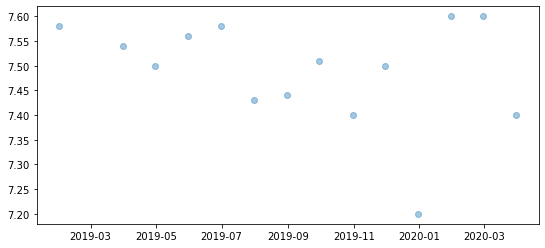

In [280]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)

ax.scatter(df_mensal.index, df_mensal['Valor pH(U.pH)'], alpha=0.4)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=None, interval=2, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.show()